# 셀프 주유소는 정말 저렴할까?

In [13]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 1. 서울시 구별 주유소 가격 정보 얻기

In [14]:
url = 'https://www.opinet.co.kr/user/main/mainView.do'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(2)

In [15]:
# 싼주유소 찾기
driver.find_element_by_css_selector('.ic_m1').click()

In [16]:
# 서울 자치구 리스트 가져오기
metro = driver.find_element_by_xpath('//*[@id="SIDO_NM0"]')     # 광역시도
metro.send_keys('서울')
time.sleep(1)

In [17]:
sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')     # 시군구
gu_list = sigungu.find_elements_by_css_selector('option')
gu_names = [gu.text for gu in gu_list]
del gu_names[0]                         # 시/군/구

In [18]:
# 엑셀 저장
driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()

In [19]:
# 25개 자치구에 대해서 주유소 정보 엑셀 저장
for gu in gu_names:
    sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
    sigungu.send_keys(gu)
    time.sleep(2)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()
    time.sleep(2)

In [20]:
driver.close()

### 2. 구별 휘발유 가격에 대한 데이터 정리

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import pandas as pd
from glob import glob

In [23]:
# glob의 역활
glob('C:/Users/lunaw/Downloads/지역*.xls')

['C:/Users/lunaw/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (25).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별

In [24]:
file = glob('C:/Users/lunaw/Downloads/지역*.xls')[0]
df = pd.read_excel(file, header=2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,2019,2005,-
1,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,2199,2034,2019,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,2204,2063,2038,-
3,서울특별시,SK서광주유소,서울 강남구 역삼로 142,SK에너지,02-562-4855,Y,2255,2075,2055,-
4,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,2077,2049,-


In [25]:
# 25개 파일을 읽어서 하나의 데이터 프레임으로 만들기
df_list = []
for file in glob('C:/Users/lunaw/Downloads/지역*.xls'):
    gs = pd.read_excel(file, header=2)
    df_list.append(gs)

df = pd.concat(df_list)
df.shape

(492, 10)

In [26]:
df = df[['상호', '주소', '휘발유', '셀프여부', '상표']]
df.head()

,상호,주소,휘발유,셀프여부,상표
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),2019,Y,SK에너지
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,2034,Y,현대오일뱅크
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),2063,Y,현대오일뱅크
3,SK서광주유소,서울 강남구 역삼로 142,2075,Y,SK에너지
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),2077,Y,GS칼텍스


In [27]:
df.rename(columns={'휘발유':'가격', '셀프여부':'셀프'}, inplace=True)
df.tail()

,상호,주소,가격,셀프,상표
26,(주)정직한주유소,서울 송파구 오금로 455 (거여동),2078,Y,현대오일뱅크
27,한강에너지(주)퍼스트주유소,서울 송파구 삼학사로 22 (석촌동),2085,Y,SK에너지
28,대성석유(주)석촌주유소,서울 송파구 백제고분로 289,2127,N,GS칼텍스
29,(주)뉴명성산업 남성주유소,서울 송파구 백제고분로 474 (방이동),2148,N,현대오일뱅크
30,대신석유(주)진양주유소,서울 송파구 올림픽로 499 (풍납동),2218,N,SK에너지


In [28]:
df['구'] = df.주소.str.split().str[1]
df.head()

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),2019,Y,SK에너지,강남구
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,2034,Y,현대오일뱅크,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),2063,Y,현대오일뱅크,강남구
3,SK서광주유소,서울 강남구 역삼로 142,2075,Y,SK에너지,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),2077,Y,GS칼텍스,강남구


In [29]:
df.구.unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 30
Data columns (total 6 columns):
상호    492 non-null object
주소    492 non-null object
가격    492 non-null object
셀프    492 non-null object
상표    492 non-null object
구     492 non-null object
dtypes: object(6)
memory usage: 26.9+ KB


In [31]:
# 가격이 '-'는 삭제하고, 정수로 변환
df = df[df.가격 != '-']
df.가격 = df.가격.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 30
Data columns (total 6 columns):
상호    478 non-null object
주소    478 non-null object
가격    478 non-null int32
셀프    478 non-null object
상표    478 non-null object
구     478 non-null object
dtypes: int32(1), object(5)
memory usage: 24.3+ KB


In [32]:
df.to_csv('서울-주유소(220418).csv', index=False)

### 3. 셀프 주유소가 정말 저렴한지 확인

In [33]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [34]:
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams.update({'text.color': "gray",
                    'axes.labelcolor': "white",
                    'xtick.color': "white",
                    'ytick.color': "white"
                    })

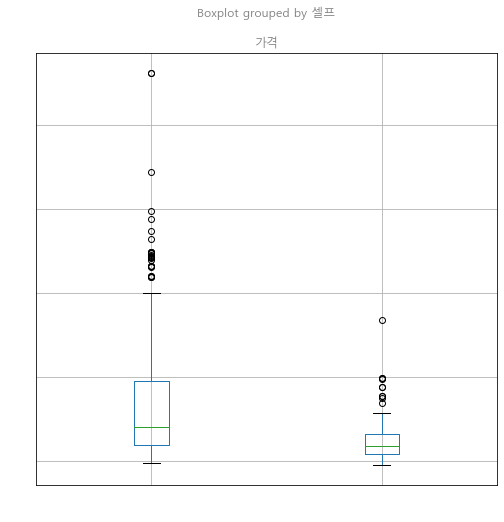

In [35]:
df.boxplot(column='가격', by='셀프', figsize=(8,8))
plt.show()

In [36]:
df[df.셀프 == 'Y'].가격.mean(), df[df.셀프 == 'N'].가격.mean()

(2043.5731225296443, 2154.1644444444446)

In [37]:
df[df.셀프 == 'Y'].shape, df[df.셀프 == 'N'].shape

((253, 6), (225, 6))

- 사이파이를 이용한 가설검정
    - 2-sample T 검정(독립표본 T 검정)

In [38]:
import scipy as sp
sp.stats.ttest_ind(df[df.셀프 == 'Y'].가격, df[df.셀프 == 'N'].가격, equal_var = False)

Ttest_indResult(statistic=-9.418164919904326, pvalue=3.3830236399208255e-18)

- p-value가 0.05보다 작으므로 귀무가설 기각, 즉 대립가설 채택
    - H0(귀무가설): 셀프주유소와 일반주유소의 가격 차이가 없다.
    - H1(대립가설): 셀프주유소의 가격이 일반주유소보다 저렴하다.

- 상표별로 가격 확인

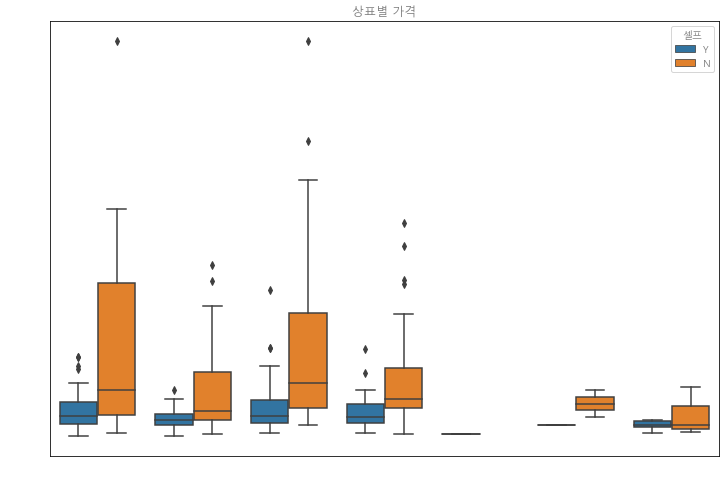

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=df)
plt.title('상표별 가격')
plt.show()

### 4. 구별 휘발유 가격 비교

In [40]:
import json, folium

In [41]:
# 가격이 착한 주유소 Top 5
df.sort_values(by='가격').head()

,상호,주소,가격,셀프,상표,구
1,영등포제일셀프주유소,서울 영등포구 가마산로 379,1989,Y,현대오일뱅크,영등포구
0,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1989,Y,SK에너지,영등포구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1994,Y,알뜰(ex),서초구
0,현대오일뱅크(주)직영 문성골주유소,서울 관악구 문성로 97 (신림동),1994,N,현대오일뱅크,관악구
0,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1994,Y,SK에너지,양천구


In [42]:
# 가격이 비싼 주유소 Top 5
df.sort_values(by='가격', ascending=False).head()

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2926,N,SK에너지,중구
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2925,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2689,N,GS칼텍스,중구
7,약수주유소,서울 중구 다산로 173,2596,N,GS칼텍스,중구
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구


In [43]:
# 구별 비교
df.groupby('구')['가격'].agg(['mean', 'min', 'max']).sort_values(by='mean', ascending=False)

,mean,min,max
구,,,
중구,2395.300000,2009,2926
용산구,2394.538462,2096,2925
종로구,2309.250000,2149,2488
강남구,2224.764706,2019,2578
성동구,2138.823529,1999,2398
마포구,2113.083333,2048,2349
서초구,2112.933333,1994,2495
강동구,2108.071429,2019,2238
영등포구,2088.888889,1989,2465


- 구별 비교한 것을 단계구분도로 표시

In [44]:
gu_data = df.groupby('구')[['가격']].mean()
gu_data.head(3)

,가격
구,
강남구,2224.764706
강동구,2108.071429
강북구,2033.909091


In [45]:
filename = '../04.지도시각화/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(filename, encoding='utf-8'))

In [46]:
import numpy as np

def get_text_location(geo_str):
    gu_dict = {}
    for gu in geo_str['features']:
        for coord in gu['geometry']['coordinates']:
            geo = np.array(coord)
            gu_dict[gu['id']] = [np.mean(geo[:,1]), np.mean(geo[:,0])]
    return gu_dict

In [47]:
from folium.features import DivIcon

gu_dict = get_text_location(geo_str)

In [48]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data.가격,
    columns=[gu_data.index, gu_data.가격],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
for gu_name in gu_data.index:
    folium.Marker(
        location=gu_dict[gu_name],
        icon=DivIcon(icon_size=(80,20), icon_anchor=(20,0),
            html=f'<div style="font-size: 10pt">{gu_name}</div>'
        )
    ).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">구별 휘발유 가격</h3>'    
map.get_root().html.add_child(folium.Element(title_html)) 
map

- 각 구별 가장 싼 주유소와 비싼 주유소

In [49]:
df

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),2019,Y,SK에너지,강남구
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,2034,Y,현대오일뱅크,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),2063,Y,현대오일뱅크,강남구
3,SK서광주유소,서울 강남구 역삼로 142,2075,Y,SK에너지,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),2077,Y,GS칼텍스,강남구
...,...,...,...,...,...,...
26,(주)정직한주유소,서울 송파구 오금로 455 (거여동),2078,Y,현대오일뱅크,송파구
27,한강에너지(주)퍼스트주유소,서울 송파구 삼학사로 22 (석촌동),2085,Y,SK에너지,송파구
28,대성석유(주)석촌주유소,서울 송파구 백제고분로 289,2127,N,GS칼텍스,송파구
29,(주)뉴명성산업 남성주유소,서울 송파구 백제고분로 474 (방이동),2148,N,현대오일뱅크,송파구


- 각 구별 비싼 주유소

In [50]:
idx = df.groupby('구')['가격'].transform(max) == df['가격']
exp = df[idx]
exp.head()

,상호,주소,가격,셀프,상표,구
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구
15,노원교주유소,서울 도봉구 마들로 776 (도봉동),2098,Y,현대오일뱅크,도봉구
17,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),2190,N,현대오일뱅크,동대문구
8,살피재주유소,서울 동작구 상도로 334,2175,N,SK에너지,동작구
11,마포주유소,서울 마포구 마포대로 186 (공덕동),2349,N,S-OIL,마포구


- 각 구별 싼 주유소

In [51]:
idx = df.groupby('구')['가격'].transform(min) == df['가격']
cheap = df[idx]
cheap.head()

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),2019,Y,SK에너지,강남구
0,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1997,Y,S-OIL,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1997,N,현대오일뱅크,도봉구
2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1997,Y,현대오일뱅크,도봉구
0,동서울고속주유소,서울 동대문구 한천로 414,1999,Y,SK에너지,동대문구


- 각 주유소 주소의 위도 경도 구하기

In [52]:
import requests
from urllib.parse import quote

In [53]:
with open('../04.지도시각화/kakaoapikey.txt') as file:
    kakao_key = file.read()

In [54]:
local_url = 'https://dapi.kakao.com/v2/local/search/address.json'
addr = '서울 강남구 남부순환로 2718 (도곡2동)'
url = f'{local_url}?query={quote(addr)}'

In [55]:
header = {'Authorization': f'KakaoAK {kakao_key}'}

In [56]:
result = requests.get(url, headers=header).json()

In [57]:
lng = float(result['documents'][0]['x'])
lat = float(result['documents'][0]['y'])
print(lng, lat)

127.043319375098 37.4854150814069


    - 각 구별 비싼 주유소 위도, 경도

In [58]:
lng_list, lat_list = [], []
for i in exp.주소:
    url = f'{local_url}?query={quote(i)}'
    header = {'Authorization': f'KakaoAK {kakao_key}'}
    result = requests.get(url, headers=header).json()
    lng_list.append(float(result['documents'][0]['x']))
    lat_list.append(float(result['documents'][0]['y']))
exp['위도'] = lat_list
exp['경도'] = lng_list
exp.reset_index(inplace=True)
exp.head()

,index,상호,주소,가격,셀프,상표,구,위도,경도
0,33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구,37.511551,127.047115
1,15,노원교주유소,서울 도봉구 마들로 776 (도봉동),2098,Y,현대오일뱅크,도봉구,37.679015,127.049751
2,17,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),2190,N,현대오일뱅크,동대문구,37.588425,127.057395
3,8,살피재주유소,서울 동작구 상도로 334,2175,N,SK에너지,동작구,37.498360,126.951389
4,11,마포주유소,서울 마포구 마포대로 186 (공덕동),2349,N,S-OIL,마포구,37.550595,126.955637


    - 각 구별 싼 주유소 위도, 경도

In [59]:
lng_list, lat_list = [], []
for i in cheap.주소:
    url = f'{local_url}?query={quote(i)}'
    header = {'Authorization': f'KakaoAK {kakao_key}'}
    result = requests.get(url, headers=header).json()
    lng_list.append(float(result['documents'][0]['x']))
    lat_list.append(float(result['documents'][0]['y']))
cheap['위도'] = lat_list
cheap['경도'] = lng_list
cheap.reset_index(inplace=True)
cheap.head()

,index,상호,주소,가격,셀프,상표,구,위도,경도
0,0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),2019,Y,SK에너지,강남구,37.467272,127.118743
1,0,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1997,Y,S-OIL,도봉구,37.667452,127.043563
2,1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1997,N,현대오일뱅크,도봉구,37.674474,127.044067
3,2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1997,Y,현대오일뱅크,도봉구,37.663105,127.036402
4,0,동서울고속주유소,서울 동대문구 한천로 414,1999,Y,SK에너지,동대문구,37.597544,127.068039


- 각 주유소 지도위에 표시하기

In [60]:
map = folium.Map(
    location=[exp.위도.mean(), exp.경도.mean()], zoom_start=12
)
for i in exp.index:
    folium.Marker(
        location=[exp.위도[i], exp.경도[i]],
        popup = folium.Popup(exp.주소[i], max_width=200),
        tooltip=exp.상호[i],
        icon=folium.Icon(color='red')
    ).add_to(map)

for i in cheap.index:
    folium.Marker(
        location=[cheap.위도[i], cheap.경도[i]],
        popup = folium.Popup(cheap.주소[i], max_width=200),
        tooltip=cheap.상호[i],
        icon=folium.Icon(color='green')
    ).add_to(map)

title_html = '<h3 align="center" style="font-size:20px">각 구별 가격이 싼/비싼 주유소</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map

In [63]:
cheap.head()

,index,상호,주소,가격,셀프,상표,구,위도,경도
0,0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),2019,Y,SK에너지,강남구,37.467272,127.118743
1,0,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1997,Y,S-OIL,도봉구,37.667452,127.043563
2,1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1997,N,현대오일뱅크,도봉구,37.674474,127.044067
3,2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1997,Y,현대오일뱅크,도봉구,37.663105,127.036402
4,0,동서울고속주유소,서울 동대문구 한천로 414,1999,Y,SK에너지,동대문구,37.597544,127.068039


In [64]:
cheap[cheap.주소 == "서울 송파구 송파대로 397 (석촌동)"]

,index,상호,주소,가격,셀프,상표,구,위도,경도
14,1,현대오일뱅크㈜직영 잠실셀프주유소,서울 송파구 송파대로 397 (석촌동),2013,Y,현대오일뱅크,송파구,37.502734,127.10901
36,0,현대오일뱅크㈜직영 잠실셀프주유소,서울 송파구 송파대로 397 (석촌동),2013,Y,현대오일뱅크,송파구,37.502734,127.10901
